# Linear Algebra

This notebook introduces some basic linear algebra operations in python. A standard package for linear algebra is numpy, with the associated numpy.linalg package.

In [1]:
import numpy as np
import numpy.linalg as nlg
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import matpy as mp

## The Basics

### Creating arrays and matrices.

We can create random matrices, constant matrices, zero matrices, and identity, very easily.
Note the subtle changes in syntax.

In [2]:
A = np.random.randn(3,3)
B = np.zeros((3,3))
C = np.ones((3,3))
D = np.eye(3,3)

Python is zero-indexed and using c-style ordering. This may be confusing for Matlab and Fortran users.

In [3]:
print("A")
print(A)

print("\nA[0,:] returns the first row")
print(A[0,:])

print("\nA[:,0] returns the first column")
print(A[:,0])

A
[[ 1.89706592  1.61530471 -0.20950288]
 [-0.34343472  0.91381753  0.44889843]
 [-0.78451963  0.37910091 -0.57528548]]

A[0,:] returns the first row
[ 1.89706592  1.61530471 -0.20950288]

A[:,0] returns the first column
[ 1.89706592 -0.34343472 -0.78451963]


#### Vector types

numpy has three basic vector `shapes`. Suppose that we wanted a vector of length 3: [0,1,2]. We could arrange it as a column vector (3,1), a row vector (1,3), or an 'unshaped' vector (3,).

Recall that in python (3) = 3. In order to create a 1-element tuple, a comma is necessary, i.e. (3,).

In [4]:
a = np.array([0,1,2])
b = np.array([[0,1,2]])
c = np.array([[0],[1],[2]])

print(a.shape, b.shape, c.shape)

((3,), (1, 3), (3, 1))


It may seem cumbersome to have to be careful with how arrays are declared, but in practice one can create the array using either method and simply reshape it, using the `reshape` method.

In [5]:
a2 = a.reshape((1,3))
a3 = a.reshape((3,1))
print(a2.shape, a3.shape)

((1, 3), (3, 1))


The numpy.ndarray class has a few useful attributes and methods associated with it.

Attributes are essentially variables that are stored inside the class and are accessed by
`class_variable.attribute_name`

Methods are functions that are inherent to the class and can be thought of as callable attributes. Since they are functions, the call needs to end with `()` in order to execute the function. They are called by
`class_variable.method_name()`.
Simply calling `class_variable.method_name` without including the parentheses will return a handle to the method instead of executing the method.

In [6]:
print(A.shape)   # shape is an attribute, and so doesn't need ()
print(A.max())   # max and min are methods, and so
print(A.min())   #   require () to complete the call

(3, 3)
1.89706592152
-0.784519628442


Some useful methods are: 
- `ravel`, which ravels out an n-dimensional array into an unshaped vector
- `max/min`, which return the max/min of the array, respectively

In general, if you are unsure about how to use a method, simply call `help(class_object.method_name)`. Note that the `()` is ommited in this case, since we want to pass the method function, not execute the method function.

In [7]:
help(A.ravel)

Help on built-in function ravel:

ravel(...)
    a.ravel([order])
    
    Return a flattened array.
    
    Refer to `numpy.ravel` for full documentation.
    
    See Also
    --------
    numpy.ravel : equivalent function
    
    ndarray.flat : a flat iterator on the array.



### Pointers and Duplication

A quick note on pointers. Suppose `A` is a (numpy) matrix. If we call `B=A`, then `B` is actually pointing to the same object in memory as `A`, so any changes to `B` will be reflected in `A`.
For people used to working in Matlab, this can seem strange and may lead to some bugs in the beginning.

This is demonstrated below.

In [8]:
A = np.random.randn(3,3)
B = A

print(A[0,0])
B[0,0] = 0
print(A[0,0])

0.0780555507637
0.0


The `copy` method instructs the system to create an entirely new matrix in memory, so that now `A` and `B` are pointing to two distinct objects.

In [9]:
A = np.random.randn(3,3)
B = A.copy()

print(A[0,0])
B[0,0] = 0
print(A[0,0])

-0.0655533440123
-0.0655533440123


### Operations

Now let's look at some standard operations. 

#### Element-wise multiplication and addition

Recall that `A,B,C,D` are 3-by-3 random, zero, one, and identity matrices respectively. The default behaviour for the `*` and `+` operators is to act element-wise.

In [10]:
print("A")
print(A)

print("\nA times I(3-by-3) element-wise")
print(A*D)

print("\nA + I(3-by-3) element-wise")
print(A+D)

A
[[-0.06555334  1.35526185  1.23904758]
 [ 1.16149375 -1.02459042  0.6822904 ]
 [ 0.11013522 -1.0891856   0.02380953]]

A times I(3-by-3) element-wise
[[-0.06555334  0.          0.        ]
 [ 0.         -1.02459042  0.        ]
 [ 0.         -0.          0.02380953]]

A + I(3-by-3) element-wise
[[ 0.93444666  1.35526185  1.23904758]
 [ 1.16149375 -0.02459042  0.6822904 ]
 [ 0.11013522 -1.0891856   1.02380953]]


#### Matrix-vector multiplication
The matrix `A` is 3-by-3, so to compute `Ax`, we need `x` to be 3-by-n. In the case of a vector, `n=1`. Recall that we have three vectors, `a,b,c`, with shapes `(3,),(1,3),(3,1)` respectively. If we try to multiply `Ab`, the system will return an error, since they have the wrong shape.

In [11]:
try:
    np.dot(A,b)
except:
    print("The call failed.")

The call failed.


However, both `Aa` and `Ac` work, and return the expected results. If we were to left-multiply the vectors to compute `aA, bA, cA`, we would find that both `aA, bA` would work, while `cA` would fail. This demonstrates some of the advantage (and danger) of the unshaped vector `a`. 

In [12]:
np.dot(A,a)
np.dot(A,c)

array([[ 3.83335702],
       [ 0.33999039],
       [-1.04156655]])

#### Matrix-matrix multiplitcation

Matrix-matrix multiplication is identical to matrix-vector multiplication.

In [13]:
np.dot(A,D)

array([[-0.06555334,  1.35526185,  1.23904758],
       [ 1.16149375, -1.02459042,  0.6822904 ],
       [ 0.11013522, -1.0891856 ,  0.02380953]])

## Linear Algebra Package

The numpy.linalg package, which has been imported as `nlg`, provides a suite of tools for processing matrices and vectors.
 
### System Solves 
Given `Ax=a`, we want to solve for `x`.

In [14]:
x = nlg.solve(A,a)
print(x)

[-2.13166718 -2.00627696  2.08167366]


### Matrix and Vector Norms

The `numpy.linalg.norm` function computes the norm of matrices and vectors. The default behaviour is the 2-norm that is **not** scaled by the vector/matrix length. That is, for a vector,

$$nlg.norm(x) = \sqrt{\Sigma_{i=1}^{i=Nx}x_i^2}$$

A more complete discussion is provided by the help page (also on the website).

In [15]:
help(nlg.norm)

Help on function norm in module numpy.linalg.linalg:

norm(x, ord=None, axis=None, keepdims=False)
    Matrix or vector norm.
    
    This function is able to return one of eight different matrix norms,
    or one of an infinite number of vector norms (described below), depending
    on the value of the ``ord`` parameter.
    
    Parameters
    ----------
    x : array_like
        Input array.  If `axis` is None, `x` must be 1-D or 2-D.
    ord : {non-zero int, inf, -inf, 'fro', 'nuc'}, optional
        Order of the norm (see table under ``Notes``). inf means numpy's
        `inf` object.
    axis : {int, 2-tuple of ints, None}, optional
        If `axis` is an integer, it specifies the axis of `x` along which to
        compute the vector norms.  If `axis` is a 2-tuple, it specifies the
        axes that hold 2-D matrices, and the matrix norms of these matrices
        are computed.  If `axis` is None then either a vector norm (when `x`
        is 1-D) or a matrix norm (when `x` is

### Eigenproblems

The `numpy.linalg.eig` function solves eigenvalue problems of the form $Ax = \lambda x$. To solve general eigenvalue problems $Ax=\lambda Bx$, the `scipy.lingalg.eig` function can be used.

In [16]:
Nx  = 100
dx  = 1./Nx
x = np.arange(dx/2, 1, dx)
Dxx = mp.FiniteDiff(x,3,DiffOrd=2,spb=False,uniform=True,Periodic=True)

In [17]:
eigvals, eigvecs = nlg.eig(1j*Dxx)
inds = np.argsort(-eigvals.imag)

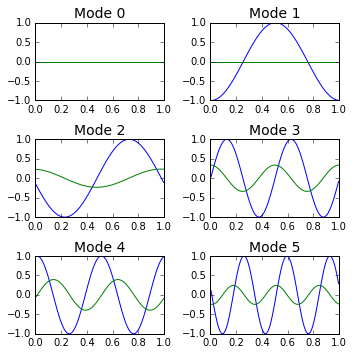

In [18]:
plt.figure(figsize=(5,5))
for ii in range(6):
    plt.subplot(3,2,ii+1)
    
    v = eigvecs[:,inds[ii]]
    # Re-phase/re-scale to have argmax at 1 + 0*i
    v *= 1./v[np.argmax(np.abs(v))]
    
    plt.plot(x, v.real)
    plt.plot(x, v.imag)
    
    plt.title('Mode {0:d}'.format(ii), fontsize=14)
    
    plt.xlim(0,1)
    plt.ylim(-1,1)
plt.tight_layout(True)